<a href="https://colab.research.google.com/github/YanNews2805/C-lculo-Num-rico/blob/main/Trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equações não lineares em uma variável

 Método gráfico

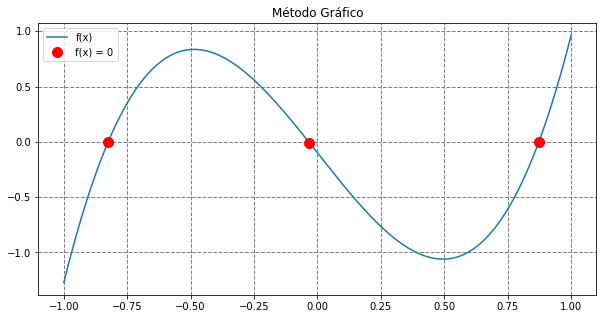

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import math


def f(x):
    return 4*(x**3) - 3*x -0.1*np.exp(-x)
  

# Creating vectors X and Y

x = np.linspace(-1, 1, 1000)
y = f(x)



# Create the plot

fig = plt.figure(figsize = (10, 5))
plt.plot(x, y, label="f(x)")
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.title("Método Gráfico")

plt.plot(-0.826, f(-0.826),'.g', ms=20,label="f(x) = 0", color="red")
plt.plot(-0.032, f(-0.032),'.g', ms=20, color="red")
plt.plot(0.872, f(0.872),'.g', ms=20, color="red")
plt.legend()


# Show the plot

plt.show()

Método da bissecção

          x1     f(x1)        x2     f(x2)        xm       |f(xm)|
0   0.800000 -0.396933  1.000000  0.963212  0.900000  1.753430e-01
1   0.800000 -0.396933  0.900000  0.175343  0.850000  1.362415e-01
2   0.850000 -0.136241  0.900000  0.175343  0.875000  1.300130e-02
3   0.850000 -0.136241  0.875000  0.013001  0.862500  6.323399e-02
4   0.862500 -0.063234  0.875000  0.013001  0.868750  2.552275e-02
5   0.868750 -0.025523  0.875000  0.013001  0.871875  6.362696e-03
6   0.871875 -0.006363  0.875000  0.013001  0.873437  3.293763e-03
7   0.871875 -0.006363  0.873437  0.003294  0.872656  1.540845e-03
8   0.872656 -0.001541  0.873437  0.003294  0.873047  8.748637e-04
9   0.872656 -0.001541  0.873047  0.000875  0.872852  3.333894e-04
10  0.872852 -0.000333  0.873047  0.000875  0.872949  2.706374e-04
11  0.872852 -0.000333  0.872949  0.000271  0.872900  3.140091e-05
12  0.872900 -0.000031  0.872949  0.000271  0.872925  1.196120e-04
13  0.872900 -0.000031  0.872925  0.000120  0.872913  4.410400

<Figure size 432x288 with 0 Axes>

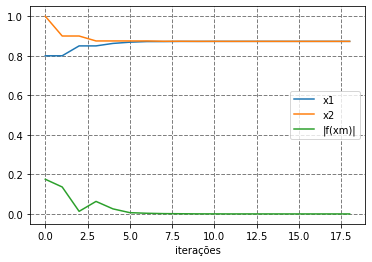

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.DataFrame(columns=["x1","f(x1)","x2","f(x2)","xm","|f(xm)|"])
a = 0.6
b = 1
e = 10**-6


def f(x):
    return 4*(x**3) - 3*x -0.1*np.exp(-x)


def bisection(f, a, b, e, dataframe):
  if f(a)*f(b) < 0:
    p = (a + b) / 2
    while abs(f(p)) > e:
        if f(p) == 0:
            return p
        if f(p) * f(a) < 0:
            b = p
        else:
            a = p
        p = (a + b) / 2
        dataframe = dataframe.append({"x1": a, "f(x1)": f(a), "x2": b,
                                    "f(x2)": f(b), "xm": p, "|f(xm)|": abs(f(p))}, ignore_index=True)
    return dataframe
  else:
    return "Não satisfaz a condição inical"


bisection_result = bisection(f, a, b, e, df)
print(bisection_result)

plt.figure()
bisection_result.plot(y=["x1", "x2", "|f(xm)|"],use_index=True)
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("iterações")

plt.show()




Método da falsa-posição

         x1     f(x1)   x2     f(x2)        xs       |f(xs)|
0  0.800000 -0.396933  1.0  0.963212  0.858366  8.773240e-02
1  0.858366 -0.087732  1.0  0.963212  0.870190  1.672039e-02
2  0.870190 -0.016720  1.0  0.963212  0.872405  3.094715e-03
3  0.872405 -0.003095  1.0  0.963212  0.872813  5.696730e-04
4  0.872813 -0.000570  1.0  0.963212  0.872889  1.047596e-04
5  0.872889 -0.000105  1.0  0.963212  0.872902  1.926113e-05
6  0.872902 -0.000019  1.0  0.963212  0.872905  3.541235e-06
7  0.872905 -0.000004  1.0  0.963212  0.872905  6.510661e-07


<Figure size 432x288 with 0 Axes>

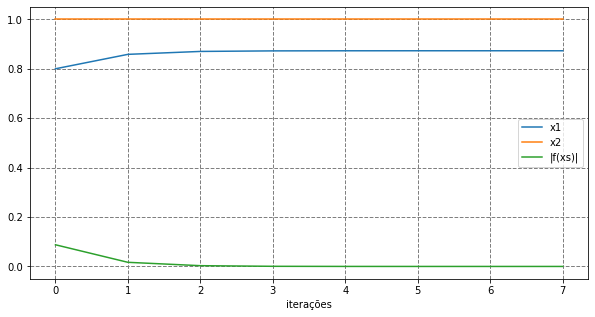

In [ ]:
import math
import pandas as pd
import pandas as pd
import numpy as np


df = pd.DataFrame(columns=["x1","f(x1)","x2","f(x2)","xs","|f(xs)|"])
a = 0.6
b = 1
e = 10**-6


def f(x):
    return 4*(x**3) - 3*x -0.1*np.exp(-x)


def falsaposicao (f, a, b, e, dataframe):
  if f(a)*f(b) < 0:
      p = (a + b) / 2
      while abs(f(p)) > e:
          if f(p) == 0:
              return p
          if f(p) * f(a) < 0:
              b = p
          else:
              a = p
          p = a + (f(a)*(b-a))/(f(a) - f(b))
          dataframe = dataframe.append({"x1": a, "f(x1)": f(a), "x2": b,
                                    "f(x2)": f(b), "xs": p, "|f(xs)|": abs(f(p))}, ignore_index=True)
      return dataframe
  else:
    return "Não satisfaz a condição inicial"


falsaposicao_result = falsaposicao(f, a, b, e, df)
print(falsaposicao_result)
plt.figure()
falsaposicao_result.plot(y=["x1", "x2", "|f(xs)|"],use_index=True, figsize = (10, 5))
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("iterações")

plt.show()


 Método de Newton

         xk     f(xk)     f'(xk)      xk+1     |f(xk+1)|
0  0.600000 -0.990881   1.374881  1.320703  5.225777e+00
1  1.320703  5.225777  17.957776  1.029700  1.242274e+00
2  1.029700  1.242274   9.759085  0.902405  1.916678e-01
3  0.902405  0.191668   6.812586  0.874271  8.466227e-03
4  0.874271  0.008466   6.213915  0.872909  1.942610e-05
5  0.872909  0.000019   6.185407  0.872905  1.031144e-10


<Figure size 432x288 with 0 Axes>

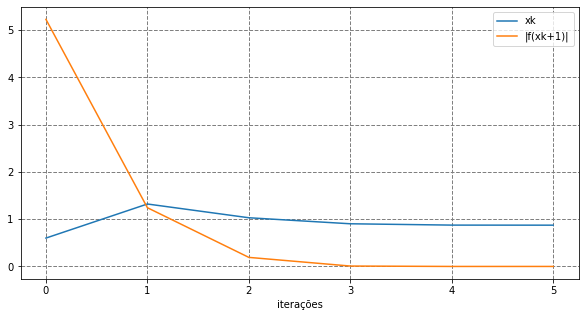

In [ ]:
# Método de Newton
import math
from scipy.misc import derivative
import math
import pandas as pd


df = pd.DataFrame(columns=["xk","f(xk)","f'(xk)","xk+1","|f(xk+1)|"])
x0 = 0.6
epsilon = 1e-6


def f(x):
  return 4*x**3 - 3*x -0.1*math.exp(-x)


def newton(f, x0, epsilon, dataframe):
  x = x0
  while abs(f(x)) > epsilon:
    dfdx = derivative(f, x, dx=1e-6)
    x1 = x - (f(x)/dfdx)
    dataframe = dataframe.append({"xk": x, "f(xk)": f(x), "f'(xk)": dfdx,
                                  "xk+1": x1, "|f(xk+1)|": abs(f(x1))},
                                  ignore_index=True)
    x = x1
  return dataframe


newton_result = newton(f,x0, epsilon, df)
print(newton_result)

plt.figure()
newton_result.plot(y=["xk", "|f(xk+1)|"],use_index=True, figsize = (10, 5))
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("iterações")

plt.show()



Método das secantes

       xk-1   f(xk-1)        xk     f(xk)      xk+1     |f(xk+1)|
0  0.500000 -1.060653  0.700000 -0.777659  1.249593  4.027424e+00
1  1.249593  4.027424  0.700000 -0.777659  0.788947  4.479951e-01
2  0.700000 -0.777659  0.788947 -0.447995  0.909820  2.427767e-01
3  0.788947 -0.447995  0.909820  0.242777  0.867338  3.411204e-02
4  0.909820  0.242777  0.867338 -0.034112  0.872572  2.062175e-03
5  0.867338 -0.034112  0.872572 -0.002062  0.872909  1.956554e-05
6  0.872572 -0.002062  0.872909  0.000020  0.872905  1.103575e-08


<Figure size 432x288 with 0 Axes>

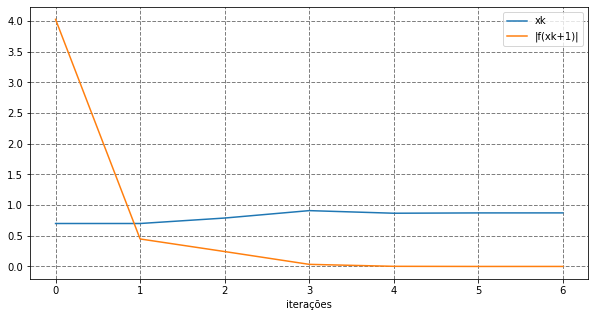

In [ ]:
# Método das secantes
import math
import pandas as pd


df = pd.DataFrame(columns=["xk-1","f(xk-1)","xk","f(xk)","xk+1","|f(xk+1)|"])

x0 = 0.5
x1 = 0.7
epsilon = 1e-6 


def f(x):
  return 4*x**3 - 3*x -0.1*math.exp(-x)

def metsec(x0,x1,k, dataframe):
  while abs(f(x1)) > epsilon:
    x2 = x1 - (x1 - x0)*f(x1) / (f(x1)-f(x0))
    dataframe = dataframe.append({"xk-1": x0, "f(xk-1)": f(x0), "xk": x1,
                                  "f(xk)": f(x1), "xk+1": x2, "|f(xk+1)|": abs(f(x2))}, ignore_index=True)
    if abs(f(x2)) > abs(f(x1)):
      x0 = x2
    else:
      x0 = x1
      x1 = x2 
  return dataframe


secante_result = metsec(x0, x1, k, df)
print(secante_result)

plt.figure()
secante_result.plot(y=["xk", "|f(xk+1)|"],use_index=True, figsize = (10, 5))
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.xlabel("iterações")

plt.show()



Sistema de Equações Não Lineares

Método de Newton Multivariável

5.102041  	 5.102041 	 1.275510 	 1.275510   

         h1        h2        h3        h4      resíduos
0  1.820308  2.694387  1.232484  1.248279  4.515458e+00
1  4.274707  4.720972  1.275141  1.275363  4.550725e+00
2  5.065472  5.094647  1.275510  1.275510  1.164957e+00
3  5.101975  5.102038  1.275510  1.275510  4.389386e-02
4  5.102041  5.102041  1.275510  1.275510  6.835583e-05
5  5.102041  5.102041  1.275510  1.275510  7.709240e-11
6  5.102041  5.102041  1.275510  1.275510  0.000000e+00
7  5.102041  5.102041  1.275510  1.275510  0.000000e+00
8  5.102041  5.102041  1.275510  1.275510  0.000000e+00
9  5.102041  5.102041  1.275510  1.275510  0.000000e+00


<Figure size 432x288 with 0 Axes>

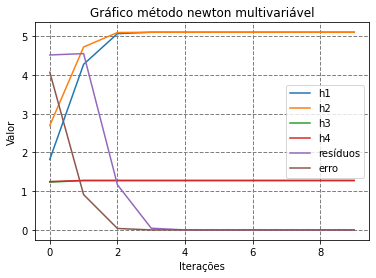

In [ ]:
# 2 Método de Newton multivariável

from math import cos,sin,pi,exp,sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Matriz coluna

dataframe = pd.DataFrame(columns=["h1","h2","h3","h4","resíduos", "erro"])

def Fs(h1,h2,h3,h4):
  f1 = (0.5 + 0.1*(2*9.8*h3)**(1/2) -0.1*(2*9.8*h1)**(1/2)) 
  f2 = (0.5 + 0.1*(2*9.8*h4)**(1/2) - 0.1*(2*9.8*h2)**(1/2)) 
  f3 = (0.5 - 0.1*(2*9.8*h3)**(1/2)) 
  f4 = (0.5 - 0.1*(2*9.8*h4)**(1/2))
  return np.matrix([[f1],[f2],[f3],[f4]])


# Inversa da matriz
def Jinv(h1,h2,h3,h4):
  # Matriz Jacobiana
  J = np.matrix([[-0.221359/sqrt(h1),0,0.221359/sqrt(h3),0],[0,-0.221359/sqrt(h2),0,0.221359/sqrt(h4)],[0,0,-0.221359/sqrt(h3),0],[0,0,0,-0.221359/sqrt(h4)]])
  JV = np.linalg.inv(J)
  return [J, JV]

# Tolerância
TOL = 10**(-6)

# Aproximação solicitada no item 2.1
P0 = [0.2,0.5,0.85,0.93]

h1, h2 ,h3,h4 = P0

k = 0

converg = [5.102041 ,5.102041  , 1.275510 ,1.275510]


while k < 10 :
  J, JI = Jinv(h1,h2,h3,h4)
  F = Fs(h1,h2,h3,h4)
  Y = -JI*F
  X = np.matrix(P0).T+Y
  h1, h2, h3,h4 = float(X[0][0]),float(X[1][0]),float(X[2][0]),float(X[3][0])
  mag = sqrt((h1-P0[0])**2+(h2-P0[1])**2+(h3-P0[2])**2+(h4-P0[3])**2)
  P0 = [h1,h2,h3,h4]
  residuo = float(Y[0][0]+Y[1][0]+Y[2][0]+Y[3][0])
  erro = np.sqrt((h1 - converg[0])**2 + (h2 - converg[1])**2 + (h3 - converg[2])**2 + (h4 - converg[3])**2)

  dataframe = dataframe.append({"h1": h1, "h2": h2, "h3": h3,
                                  "h4": h4, "resíduos": residuo, "erro": erro}, ignore_index=True)
  k+=1
  

#2.1:
print("{0:1.6f}  \t {1:1.6f} \t {2:1.6f} \t {3:1.6f}   \n".format(h1,h2,h3,h4))

#2.2:
print(dataframe[["h1","h2","h3","h4","resíduos"]])

#2.3:
plt.figure()
dataframe.plot(use_index=True)
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.title("Gráfico método newton multivariável")
plt.xlabel("Iterações")
plt.ylabel("Valor")
plt.show()







Método de Gauss

In [ ]:
import math

def gauss(A,b):
  #acessando as linhas 
  for i in range (len(A)):
    #verificar qual é o maior pivô
    pivo = math.fabs(A[i][i])
    linhaPivo = i
    for j in range(i+1, len(A)):
      if math.fabs(A[j][i]) > pivo:
        pivo = math.fabs(A[j][i])
        linhaPivo= j
    #permutas as linhas
    if linhaPivo != i:
      linhaAuxiliar = A[i]
      A[i] = A[linhaPivo]
      A[linhaPivo] = linhaAuxiliar

      bAuxiliar = b[i]
      b[i]= b[linhaPivo]
      b[linhaPivo] = bAuxiliar
    #eliminação gaussiana
    for m in range(i+1, len(A)):
      multiplicador = A[m][i]/A[i][i]
      for n in range(i, len(A)):
        A[m][n] -= multiplicador*A[i][n]
      b[m]-= multiplicador*b[i]

  for k in range(len(A)):
    print(A[k])
  print()
  print(b)
  print()

  calculaSolucao(A,b)


def calculaSolucao(A,b):
    vetorSolucao = []
    for i in range(len(A)):
      vetorSolucao.append(0)
    linha = len(A)-1
    while linha>= 0:
      x = b[linha]
      coluna = len(A)-1
      while coluna > linha:
        x -= A[linha][coluna]*vetorSolucao[coluna]
        coluna -= 1
      x/= A[linha][linha]
      linha -= 1
      vetorSolucao[coluna]= x 
    for j in range(len(vetorSolucao)):
      print('x'+str(j+1),"=" + str(vetorSolucao[j]))
    
    
gauss(([[0.0,-2.0,-2.0,5.0,2.0,17.0],
               [0.0,13.0,2.0,5.0,-3.0,2.0],
               [14.0,0.0,5.0,-3.0,5.0,0.0],
               [-5.0,3.0,-2.0,0.0,13.0,2.0],
               [5.0,2.0,17.0,0.0,2.0,2.0],
               [3.0,-5.0,0.0,14.0,0.0,5.0]]), 
      [0.0, (5*3**(1/2))/2,10.0,5/2,0.0,0.0 ])




[14.0, 0.0, 5.0, -3.0, 5.0, 0.0]
[0.0, 13.0, 2.0, 5.0, -3.0, 2.0]
[0.0, 0.0, 14.906593406593405, 0.3021978021978021, 0.6758241758241758, 1.6923076923076923]
[0.0, 0.0, 0.0, 16.572060449686692, -2.2115739034279396, 5.803538518245484]
[0.0, 0.0, 0.0, 0.0, 15.213523131672599, 2.389679715302491]
[0.0, 0.0, 0.0, 0.0, 0.0, 15.092054093567251]

[10.0, 4.330127018922193, -4.237601958955063, -0.5633315648416993, 4.804869507140871, -0.37236178181167356]

x1 =0.7096445611389771
x2 =0.4495896073331428
x3 =-0.29632148776180106
x4 =0.017312705194408372
x5 =0.3197043396893099
x6 =-0.024672703894586947


Método de Jacobi

Iteração 0
x =  [0.7, -1.6, 0.6]
Iteração:  1
xk =  [0.96, -1.8600000000000003, 0.9400000000000001]
Iteração:  2
xk =  [0.9780000000000002, -1.9800000000000002, 0.9660000000000001]
Iteração:  3
xk =  [0.9994000000000001, -1.9888000000000003, 0.9984000000000001]
Iteração:  4
xk =  [0.9979200000000001, -1.99956, 0.9967600000000001]
Iteração:  5
xk =  [1.000236, -1.9989360000000003, 1.000284]
Iteração:  6
xk =  [0.9997588000000001, -2.000104, 0.9996336000000001]
Iteração:  7
xk =  [1.00005744, -1.99987848, 1.0000794400000002]
Iteração:  8
xk =  [0.9999677519999999, -2.000027376, 0.9999520560000001]
Iteração:  9
xk =  [1.0000102696, -1.9999839616, 1.0000146624]
Iteração:  10
xk =  [0.9999953260800001, -2.0000049864, 0.99999313456]
          x1        x2        x3    errox1    errox2    errox3
0   0.700000 -1.600000  0.600000  0.300000  0.400000  0.400000
1   0.960000 -1.860000  0.940000  0.300000  0.140000  0.060000
2   0.978000 -1.980000  0.966000  0.040000  0.020000  0.034000
3   0.99940

<Figure size 432x288 with 0 Axes>

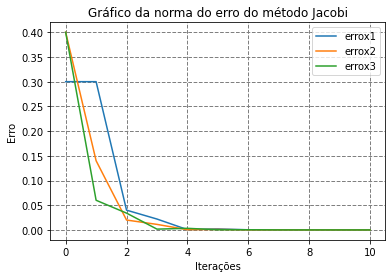

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(columns=["x1","x2","x3", 
                           "errox1", "errox2", "errox3"])


def comparar(x,xk,e):
  soma = 0
  zip_object = zip(x, xk)
  for list1_i, list2_i in zip_object:
    soma += math.fabs(list1_i-list2_i)

  if (soma < e):
    return True
  else:
    return False   

valorfinal = [1,-2,1]

def gaussJacobi(A,b,iteracoes,e, dataframe):
  n = len(b)
  sol = True
  x = b.copy()
  for i in list(range(1,n+1,1)):
    if (math.fabs(A[i-1][i-1]) > 0.0):
      x[i-1] = b[i-1]/A[i-1][i-1]
    else:
      print('Deu divisão por zero')
      sol = False
      break  
  if (sol):
    print("Iteração 0")
    dataframe = dataframe.append({"x1": x[0], "x2": x[1], "x3": x[2],
                                   "errox1": abs(x[0] - valorfinal[0]) ,
                                 "errox2" : abs(x[1] - valorfinal[1]), "errox3" : abs(x[2] - valorfinal[2]),
                                   }, ignore_index=True)
    print("x = ",x)
    xk = x.copy()
    iter = 0
    while (iter < iteracoes):
      iter = iter + 1
      for i in list(range(1,n+1,1)):
        s = 0
        for j in list(range(1,n+1,1)):
          if ((i-1) != (j-1)):
            s = s + A[i-1][j-1]*x[j-1]
        xk[i-1] = (1/A[i-1][i-1])*(b[i-1]-s)
      print("Iteração: ",iter)
      print("xk = ",xk)
      dataframe = dataframe.append({"x1": xk[0], "x2": xk[1], "x3": xk[2], 
                                  "errox1": abs(x[0] - valorfinal[0]),
                                  "errox2" : abs(xk[1] - valorfinal[1]), 
                                  "errox3" : abs(xk[2] - valorfinal[2]),
                                   
                                  }, ignore_index=True)
      if comparar(x,xk,e):
        x = xk.copy()
        break    
      x = xk.copy()
  print(dataframe[["x1","x2","x3","errox1","errox2","errox3"]])
  return dataframe


A = [[10, 2,  1],
     [ 1, 5,  1],
     [ 2, 3, 10]]

b = [7, -8, 6]

resultado_jacobi =  gaussJacobi(A,b, 10, 0.0001, df)

plt.figure()
resultado_jacobi.plot(y = ["errox1", "errox2", "errox3"] , use_index=True)
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.title("Gráfico da norma do erro do método Jacobi")
plt.xlabel("Iterações")
plt.ylabel("Erro")
plt.show()






Método de Gauss-Seidel

<Figure size 432x288 with 0 Axes>

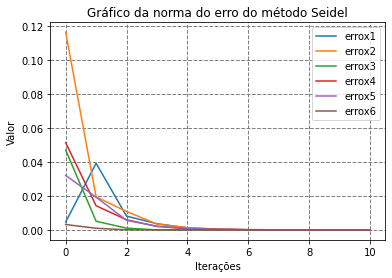

          x1        x2        x3  ...        errox4        errox5        errox6
0   0.714286  0.333087 -0.249271  ...  5.141269e-02  3.211147e-02  3.173324e-03
1   0.670354  0.469048 -0.291206  ...  1.423736e-02  1.930493e-02  9.753836e-04
2   0.717762  0.438723 -0.295274  ...  5.967045e-03  5.639322e-03  6.308935e-05
3   0.705977  0.453036 -0.296304  ...  2.041012e-03  2.195160e-03  6.599357e-05
4   0.710859  0.448286 -0.296275  ...  7.474176e-04  7.631752e-04  1.720888e-05
5   0.709194  0.450050 -0.296331  ...  2.687921e-04  2.798284e-04  7.471872e-06
6   0.709805  0.449423 -0.296317  ...  9.462574e-05  9.789112e-05  2.157409e-06
7   0.709587  0.449649 -0.296323  ...  3.629064e-05  3.750925e-05  1.196122e-06
8   0.709665  0.449568 -0.296321  ...  1.073413e-05  1.121851e-05  2.487978e-08
9   0.709637  0.449597 -0.296322  ...  6.176110e-06  6.291259e-06  4.118591e-07
10  0.709647  0.449587 -0.296321  ...  9.782892e-08  4.301718e-09  2.545447e-07

[11 rows x 12 columns]


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(columns=["x1","x2","x3","x4","x5","x6",
                            "errox1", "errox2", "errox3", "errox4", "errox5", "errox6"])

valorfinal = [ 0.709647 , 0.449587, -0.296321 , 0.017311 , 0.319706 ,-0.024673]


def gaussSeidel(A, b, vetorSolucao, N, dataframe):
  it = 0
  while it < N:
    for i in range(len(A)):
      x = b[i]
      for j in range(len(A)):
        if i != j:
          x -= A[i][j] * vetorSolucao[j]
      x /= A[i][i]
      vetorSolucao[i] = x
    dataframe = dataframe.append({"x1": vetorSolucao[0], "x2": vetorSolucao[1], "x3": vetorSolucao[2],
                                  "x4": vetorSolucao[3], "x5": vetorSolucao[4], "x6": vetorSolucao[5] , 
                                   "errox1": abs(vetorSolucao[0] - valorfinal[0]) ,
                                 "errox2" : abs(vetorSolucao[1] - valorfinal[1]), "errox3" : abs(vetorSolucao[2] - valorfinal[2]),
                                   "errox4" : abs(vetorSolucao[3] - valorfinal[3]), "errox5" : abs(vetorSolucao[4] - valorfinal[4]), 
                                  "errox6" : abs(vetorSolucao[5] - valorfinal[5]) }, ignore_index=True)
    
    it += 1
  return dataframe


resultado_seidel = gaussSeidel(A,b, [0,0,0,0,0,0], 11, df)

plt.figure()
resultado_seidel.plot(y = ["errox1", "errox2", "errox3", "errox4", "errox5", "errox6"], use_index=True)
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.title("Gráfico da norma do erro do método Seidel")
plt.xlabel("Iterações")
plt.ylabel("Valor")
plt.show()

A = [[14.0,0.0,5.0,-3.0,5.0,0.0],
               [0.0,13.0,2.0,5.0,-3.0,2.0],
               [5.0,2.0,17.0,0.0,2.0,2.0],
               [3.0,-5.0,0.0,14.0,0.0,5.0],
               [-5.0,3.0,-2.0,0.0,13.0,2.0],
               [0.0,-2.0,-2.0,5.0,2.0,17.0]]
b = [10.0, (5*3**(1/2))/2,0,0,5/2,0.0 ]

print(resultado_seidel)


Algoritmo de fatoração LU com pivoteamento

In [ ]:
import numpy as np


def soluciona_com_pivotamento(M, b, verbose=False):
    
    # quantidade de linhas e colunas da matriz quadrada M 
    n = len(M)

    if b.size != n:
        raise ValueError(f"Inválido: b deve ser n x 1 e M deve ser n x n. Recebido: b {b.size}x1 e M {n}x{n}")

    # percorreremos a k-ésima linha de pivot.
    for k in range(n-1):
        # escolha do maior pivot
        maximo = abs(M[k:,k]).argmax() + k

        if M[maximo, k] ==0:
            raise ValueError('Impossível solucionar, pois a Matriz é singular.')
        
        # troca de linhas
        if maximo != k:
            # troca k-ésima linha pela linha de índice = "maximo"
            M[[k, maximo]] = M[[maximo ,k]]
            b[[k, maximo]] = b[[maximo, k]]

        for lin in range(k+1, n):
            # multiplicador da matriz para atualização L_i = L_i + m_ij* L_j
            m = M[lin][k]/M[k][k]

            # a unica nesta coluna ja que o resto é zero
            M[lin][k] = m

            for col in range(k+1, n):
                M[lin][col] = M[lin][col] - m * M[k][col]
            
            #coluna de solução
            b[lin] -= m*b[k]

    if verbose == True:
        print(f' M: {M} \n b: {b} \n')

    # hora de substituir e achar a solução x
    x = np.zeros(n)
    k = n-1
    x[k] = b[k]/M[k, k]
    
    while k >=0:
        x[k] = (b[k] - np.dot(M[k, k+1:], x[k+1:]))/M[k,k]
        k -=1
    
    if verbose == True:
        for i in range(n):
            print('\n {} \n x{} = {} \n {}'.format(10*'=', i+1, x[i], 10*'='))
        print(' \n {} \n x = {} \n {}'.format(20*'=', x, 20*'='))
    return x


b = np.array([0.0, (5*3**(1/2))/2,10.0,5/2,0.0,0.0])
C = np.array([0.0,-2.0,-2.0,5.0,2.0,17.0,0.0,13.0,2.0,5.0,-3.0,2.0,14.0,0.0,5.0,-3.0,5.0,0.0, -5.0,3.0,-2.0,0.0,13.0,2.0, 5.0,2.0,17.0,0.0,2.0,2.0, 3.0,-5.0,0.0,14.0,0.0,5.0])
shape = (6,6)
A = C.reshape((6,6))
print(soluciona_com_pivotamento(A, b))



[ 0.70964456  0.44958961 -0.29632149  0.01731271  0.31970434 -0.0246727 ]
